# 1. Data Aggregation


### 1.1 Multiple aggregation operations


In [1]:
import pandas as pd
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
groupbyClass = titanic.groupby('class').agg({'age':'mean','who':'count'})
groupbyClass

,age,who
class,,
First,38.233441,216
Second,29.877630,184
Third,25.140620,491


##### Practice 1a:
Modify the aggregation operation above so that it also finds the age of the oldest and youngest passengers in each class

In [3]:
#groupbyClass = titanic.groupby('class').agg({'age':['mean',MISSING, MISSING] ,'who':'count'})
groupbyClass = titanic.groupby('class').agg({'age':['mean','min', 'max'] ,'who':'count'})
groupbyClass = groupbyClass.reset_index()                
groupbyClass.columns = groupbyClass.columns.droplevel(0)   # drop the top level in the column hierarchy
groupbyClass.rename(columns = {'':'class'},inplace = True) # rename the first column to be 'class'
groupbyClass

,class,mean,min,max,count
0,First,38.233441,0.92,80.0,216
1,Second,29.877630,0.67,70.0,184
2,Third,25.140620,0.42,74.0,491


##### Practice 1b: So was the oldest passenger travelling in 'first', 'second' or 'third' class? 
First class and the maximum age in each class is as follows

* First Class: 80.0

* Second Class: 70.0

* Third Class: 74.0

## 1.2 Custom aggregation operations

In [4]:
my_list = (80,20,64,19,56,12,88)
sum(e>50 for e in my_list)

4

In [5]:
groupbyClass = titanic.groupby('class').agg({'age':['nunique', lambda x: sum(e>50 for e in x)]}) 
groupbyClass.reset_index(inplace=True)
groupbyClass.columns = groupbyClass.columns.droplevel(0) # drop the top level in column hierarchy
groupbyClass.columns=['Class','UniqAgeCnt','over50Cnt']# Rename columns
groupbyClass

,Class,UniqAgeCnt,over50Cnt
0,First,57,39.0
1,Second,57,15.0
2,Third,68,10.0


##### Practice 2: Interpret the output and discuss your finding with other students.



# Data Visualisation

In [7]:
import matplotlib.pyplot as plt 

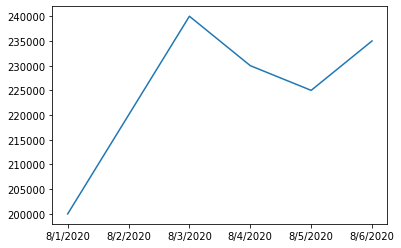

In [8]:
df=pd.DataFrame({'date':['8/1/2020', '8/2/2020', '8/3/2020', '8/4/2020','8/5/2020','8/6/2020'], 'revenue':[200000, 220000, 240000, 230000,225000,235000]} )
plt.plot(df.date,df.revenue)
plt.show()

##### Practice 3: When should we use a line chart?

Line graphs are used to track changes over short and long periods of time. When smaller changes exist, line graphs are better to use than bar graphs. Line graphs can also be used to compare changes over the same period of time for more than one group.

## 2.2 Histogram

we use histogram to see the distribution of numerical variables

(0.0, 300.0)

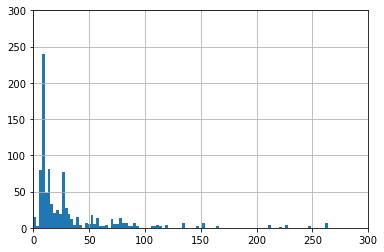

In [69]:
titanic.fare.hist(bins = 200) # try different numbers of bins 
plt.xlim(0,300)               # setting limit on x-axis
plt.ylim(0,300)               # setting limit on y-axis

##### Practice 4: 
Reduce the x-axis limit to see how much most people paid to go on the titanic. Approximately how many people paid 10 or less? 

(0.0, 350.0)

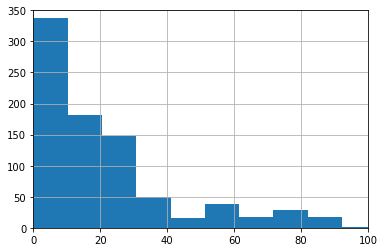

In [70]:
titanic.fare.hist(bins = 50) # you can try different bin number to have a look
plt.xlim(0, 100) # setting limit on x-axis
plt.ylim(0,350) # setting limit on y-axis

## 2.3 Boxplot

(0.0, 600.0)

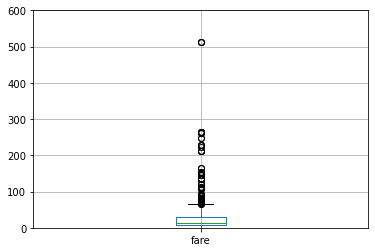

In [37]:
titanic.boxplot(column = 'fare')
plt.ylim(0, 600) # setting limit on y-axis

(0.0, 600.0)

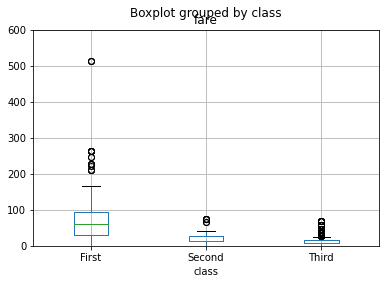

In [38]:
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600)

In [39]:
filt = ~((titanic['class'] == 'First') & (titanic['fare'] > 160))
titanic = titanic[filt]

##### Practice 5: 
Use the same technique to filter out values greater than 50 for the second class and 30 for the third class. Plot the boxplot, and observe the graph. What is the median price for each class? Hint: set a lower y-axis limit to see clearer. 

When should we use boxplot? 
Boxplots are mainly used to compare distributions because the centre, spread and overall range are immediately apparen. We can  use boxplot to compare the median, see the distribution of data and see the datapoints which are extremely different from the majority of our datapoints. 



(0.0, 160.0)

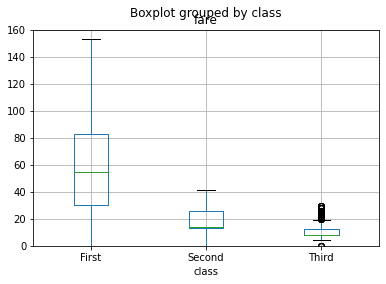

In [9]:
# deleting outliers for First class
filt = ~((titanic['class'] == 'First') & (titanic['fare'] > 160))
titanic = titanic[filt]

# deleting outliers for Second class
filt = ~((titanic['class'] == 'Second') & (titanic['fare'] > 50))
titanic = titanic[filt]

# deleting outliers for Third class
filt = ~((titanic['class'] == 'Third') & (titanic['fare'] > 30))
titanic = titanic[filt]

# Now have a look at it, should be much better!
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 160)

## 2.4 Barchart

In [10]:
groupbyClass2 = titanic.groupby('class').agg({'age':{lambda x: x[x<=18].count(),lambda x: x[x>18].count()}}) # groupby and apply functions
groupbyClass2 = groupbyClass2.reset_index() # reset its index
groupbyClass2.columns = groupbyClass2.columns.droplevel(0) # drop level 0 index
groupbyClass2.columns=['class','childCnt','adultCnt']
# now have a look, so this tells statistic about the average age and the number of passengers in each class
groupbyClass2

,class,childCnt,adultCnt
0,First,153.0,13.0
1,Second,138.0,28.0
2,Third,250.0,74.0


In [11]:
titanic[titanic.age<=18]['class'].value_counts()

Third     74
Second    28
First     13
Name: class, dtype: int64

In [12]:
titanic[titanic.age>18]['class'].value_counts()

Third     250
First     153
Second    138
Name: class, dtype: int64

##### Practice 6: 
Now follow the steps from Section 3.2 to group the 'titanic' data by class, and apply the above aggregation function to it. Call the resulting DataFrame 'groupbyClass2' and display it. Whe  should you use barchart?

Bar graphs are used to compare things between different groups or to track changes over time. However, when trying to measure change over time, bar graphs are best when the changes are larger.We usually use them to visualise categorical data against numerical data.

Text(0.5, 1.0, 'Passengers ticket class based on their adulthood')

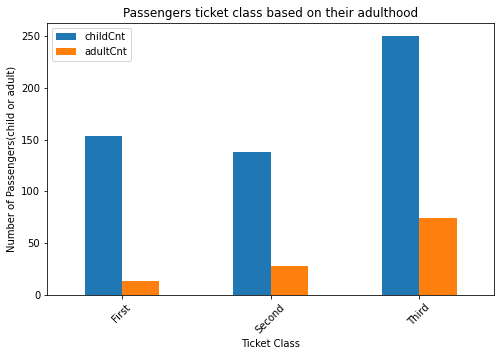

In [13]:
ax=groupbyClass2.plot.bar(figsize=(8,5))# figsize sets size of plot
ax.set_xticklabels(groupbyClass2['class'],rotation=45)# use values of column 'class' as the x axis labels. Remove this line of code to see what will happen if we do not have this line
plt.xlabel('Ticket Class')# setting a label for x axis
plt.ylabel('Number of Passengers(child or adult)')# Setting a label for y axis
plt.title('Passengers ticket class based on their adulthood')# Setting the title of chart

##### Practice 7: So which class had the most families do you think?

## Pie chart

#### Practice 8: 
Using Pie chart, plot the number of passengers in each passenger class ('pclass' column). When should we use pie chart?
Pie charts are best to use when you are trying to compare parts of a whole. They do not show changes over time.

In [15]:
dfGrpClass = titanic.groupby('class').agg({'who':'count'})
dfGrpClass = dfGrpClass.reset_index()
dfGrpClass

,class,who
0,First,194
1,Second,177
2,Third,450


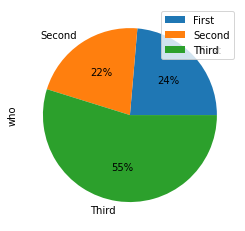

In [16]:
labels = list(dfGrpClass['class'])
colors = ['gold', 'lightskyblue', 'lightcoral']
dfGrpClass.plot.pie(y='who',autopct='%1.0f%%',labels=labels)

## 2.7 Scatter Plot

In [17]:
df = pd.DataFrame({'Name' : ['Mike','Aaron','Brad','Steve','George','Mitchell','Shaun','Glenn','Pat','Robert','David'],
'Age' : [39,28,44,25,32,33,31,26,22,25,28],
'Runs' :[1310,662,1403,828,672,1140,655,1040,557,1030,1140]})
df

,Name,Age,Runs
0,Mike,39,1310
1,Aaron,28,662
2,Brad,44,1403
3,Steve,25,828
4,George,32,672
5,Mitchell,33,1140
6,Shaun,31,655
7,Glenn,26,1040
8,Pat,22,557
9,Robert,25,1030


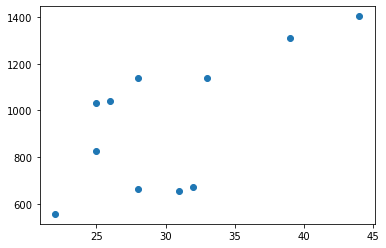

In [18]:
plt.scatter(df['Age'], df['Runs'])
plt.show()

###### Practice 9: 
We now have two views of the same data, the table (DataFrame) view and the plot. What information do you gain/lose in these different views?

We mainly use scatter plot to see the relationship between two numerical variables.

You would get below message when you run some of the codes which you found on the Internet. The following warning does not mean that the code has error, it just informs you that there is a new version of this code and you can use the new one. You can copy-paste the suggested function in the below warning and search for it on the Internet to see the newer version of this code. We used a newer version in this tutorial. However, there are more than one fomrat to write a code.

In [19]:
fun = {'age':{'unique age count':'nunique','over 50s count':lambda x: sum(e>50 for e in x)}}
groupbyClass = titanic.groupby('class').agg(fun).reset_index()  # turn groups into column values
groupbyClass.columns = groupbyClass.columns.droplevel(0)        # drop the top level in column hierarchy
groupbyClass.rename(columns = {'':'class'},inplace = True)      # rename the first column
groupbyClass

C:\Users\jalal\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


,class,unique age count,over 50s count
0,First,55,38.0
1,Second,57,15.0
2,Third,68,10.0


# References
https://nces.ed.gov/nceskids/help/user_guide/graph/whentouse.asp#:~:text=Line%20graphs%20are%20used%20to,for%20more%20than%20one%20group.